# 3-1 k-최근접 이웃 회귀

이제는 빙어인지 밀어인지 분류하는게 아니라 수치를 예측해야 한다...!!(회귀) 나는 개 감자니까 !!! 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 하자!  
https://github.com/rickiepark/hg-mldl 데이터셋 참고

In [128]:
import numpy as np

In [129]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [130]:
import matplotlib.pyplot as plt

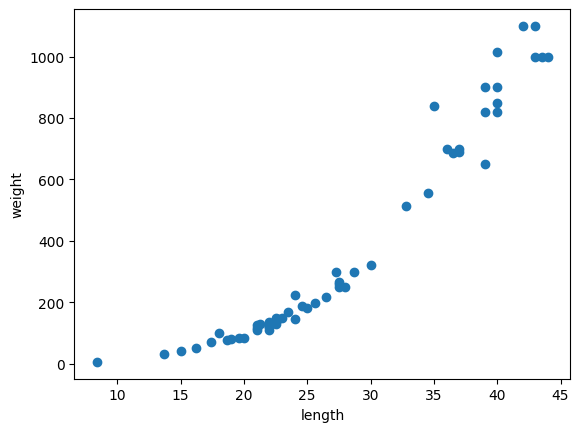

In [131]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [134]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [135]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [136]:
train_input.shape

(42,)

In [137]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [138]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
knr = KNeighborsRegressor()

In [140]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [141]:
print(knr.score(test_input, test_target))

0.992809406101064


샘플을 정확하게 분류한 개수의 비율 = 정확도 

In [142]:
from sklearn.metrics import mean_absolute_error

In [143]:
test_prediction = knr.predict(test_input)

In [144]:
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


평균적으로 19g정도 타깃값과 다르다는 것을 알 수 있음!

In [145]:
print(knr.score(train_input, train_target))

0.9698823289099254


보통 훈련 세트에서 더 높은 값이 나오는데 테스트 세트에서 더 높게 나왔네..?? -> 과소 적합.... (반대는 과대 적합)  
해결 방법은 모델을 좀 더 복잡하게 만들어주는 것!  = 이웃의 개수 k를 줄이자 !! 기본값은 5이니 3으로,,, 

In [146]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


성공~~~

# 3-2 선형 회귀

In [147]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [148]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [149]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [150]:
knr = KNeighborsRegressor(n_neighbors=3)

In [151]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [152]:
print(knr.predict([[50]]))

[1033.33333333]


무게를 1.033g으로 예측 했지만 실제 농어의 무게는 훨씬 많이 나간다 !! 왜 그럴까.... 산점도 그래프로 확인해보자

In [153]:
distances, indexes = knr.kneighbors([[50]])

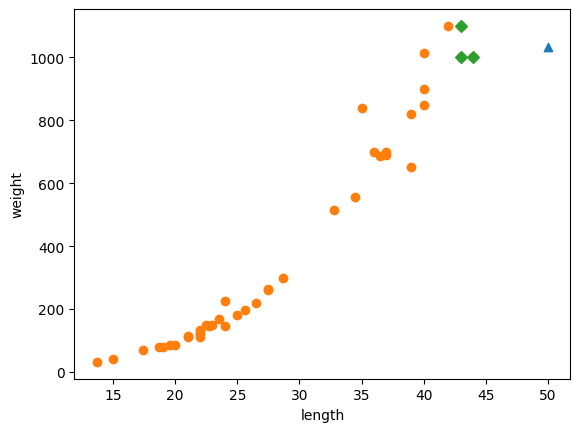

In [154]:
plt.scatter(50, 1033, marker = '^')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],  marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [155]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [156]:
distances, indexes = knr.kneighbors([[100]])

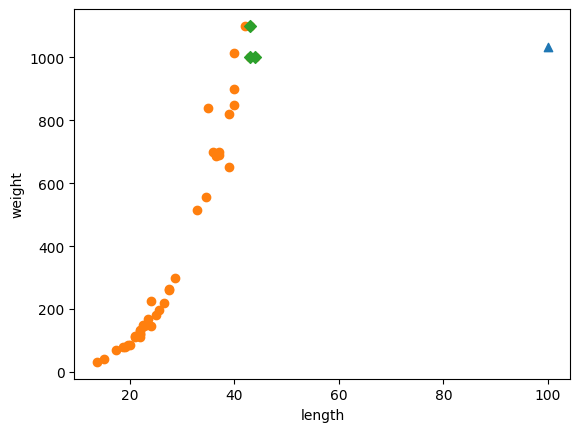

In [157]:
plt.scatter(100, 1033, marker = '^')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],  marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

주변 애들로 무게를 평균 낼테니 저 세모 물고기가 얼마나 크든 무게가 똑같을 것...

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(train_input, train_target)

LinearRegression()

In [161]:
print(lr.predict([[50]]))

[1241.83860323]


k-최근접 이웃 회귀와 달리 선형 회귀는 무게를 높게 예측했다!!!!!!!!!!! 직선의 적절한 a, b 상수값을 잘 찾았군...

In [162]:
print(lr.coef_, lr.intercept_) #기울기, 절편

[39.01714496] -709.0186449535474


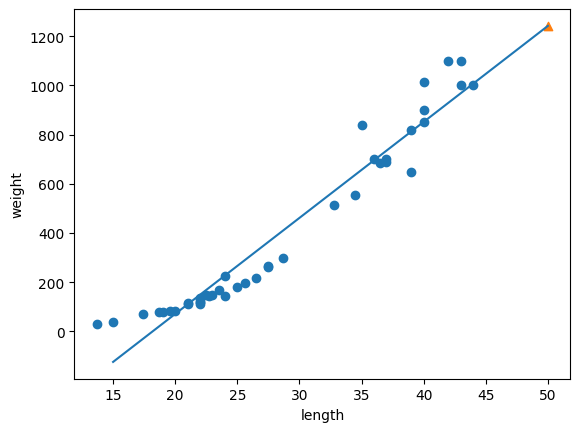

In [163]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [164]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


근데... 맘에 안 드는 부분을 발견했다... 어떻게 무게가 0보다 낮게 측정 될 수 있는가... 구부러진 곡선이 필요하다!!

In [165]:
train_ploy = np.column_stack((train_input ** 2, train_input))
test_ploy = np.column_stack((test_input ** 2, test_input))

In [166]:
print(train_ploy.shape, test_ploy.shape)

(42, 2) (14, 2)


In [167]:
lr = LinearRegression()
lr.fit(train_ploy, train_target)

LinearRegression()

In [168]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [169]:
print(lr.coef_, lr.intercept_) #a,b,c 의 적절한 값을 찾음

[  1.01433211 -21.55792498] 116.0502107827827


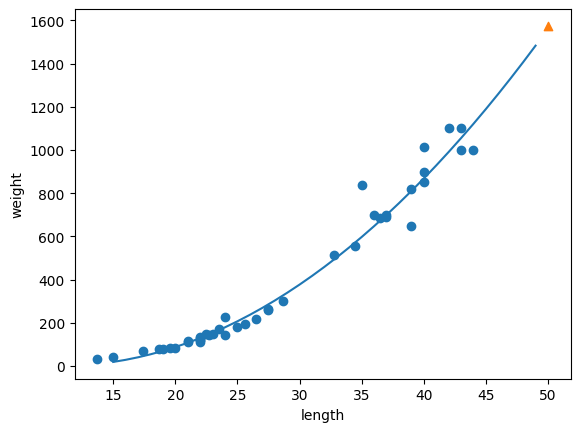

In [170]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [171]:
print(lr.score(train_ploy, train_target))
print(lr.score(test_ploy, test_target))

0.9706807451768623
0.9775935108325122


# 3-3 특성 공학과 규제

이제는 농어의 길이뿐만 아니라 높이와 두께도 같이 사용!!

In [172]:
import pandas as pd

In [173]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [174]:
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [175]:
perch_full.shape

(56, 3)

In [176]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [177]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [178]:
from sklearn.preprocessing import PolynomialFeatures

In [179]:
poly = PolynomialFeatures()

In [180]:
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [181]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [182]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [183]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [184]:
test_poly = poly.transform(test_input)

In [185]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [186]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982126
0.9714559911594125


In [187]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [188]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [190]:
lr.fit(train_poly, train_target)

LinearRegression()

In [191]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997232
-144.40564483377855


엇 엄청나게 음수가 나와버렸다... 특성의 개수를 크게 늘리면 선형 모델은 강력해지고, 훈련세트에는 완벽하나 테스트 세트에는 꽝이다

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
ss = StandardScaler()

In [197]:
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [200]:
from sklearn.linear_model import Ridge

In [202]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [203]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [204]:
train_score = []
test_score = []

In [205]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

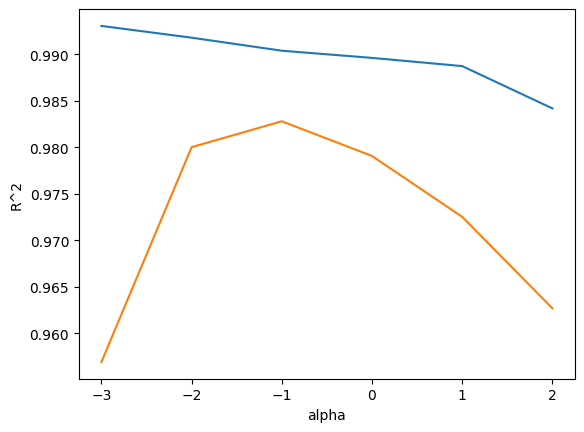

In [207]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위가 훈련세트고 아래가 테스트세트인데 훈련세트 스코어만 너무 높음 과대적합  
적절한 alpha값을 찾기 위해서는 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 것을 찾아야함

In [209]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [211]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [216]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\kimso\anaconda3\envs\sol3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\kimso\anaconda3\envs\sol3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


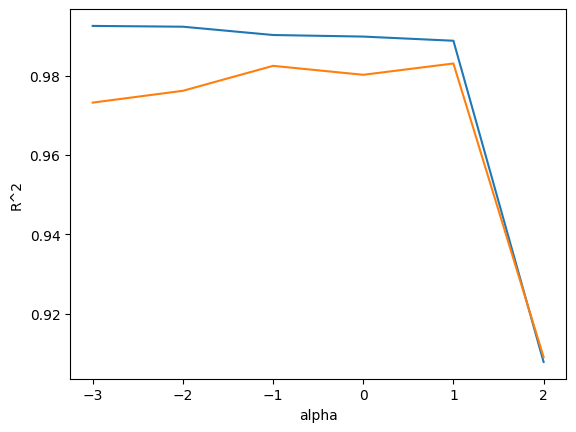

In [217]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽은 과대 적합 오른쪽으로 갈수록 과소적합되는 양상을 보임

In [221]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [222]:
print(np.sum(lasso.coef_==0))

40


Lasso 회귀가 불필요한 40개의 특성을 완전히 제거했다는 것

끝~~~~